# CRISP-DM Check-in

## Business Understanding

### Have you clearly defined your goal for your analysis?
Goal is to identify profitability patterns within genres and at different levels of investment (budget)

### Have your thought about who your audience is and how they would use this information?
Our audience is hypothetical Microsoft execs. They would use this information to make an informed decision about market entry into the movie business, and potentially develop a scalable strategy for their investment, or to be aware of the scalability issues when making their initial spend if there does not appear to be natural scalability.

### How does this help the goals of the business/organization?
Microsoft lists their company values on this <a href="https://www.microsoft.com/en-us/about/values">page.</a> Aside from the natural leveraging of Microsoft's existing strengths in AI and innovation in a new industry, an entry into the movie business would help Microsoft to propagate their vision of Diversity and Inclusion, and corporate social responsibility.  If there are formats we can identify to do this in a profitable manner, Microsoft would be able to further their goals in a sustainable way, rather than carrying this proposed segment of their business as an ongoing expense.

## Data Understanding

### What data are you using?
We are primarily using the imdb title basics, and the tn movie budgets. Time permitting we may also use title principals or title crew to identify studios and individuals that Microsoft may be able to work with within the categories we present.

### How does your data help you answer the business question?
Any business will be ultimately focused on profitability. Though there were other sources that addressed gross revenue, the tn movie budgets set was the only source we found that included information on the spend for each movie. By choosing this set we sought to answer questions of profitability first and foremost. We joined this set to imdb movies in order to also explore the same questions about profitability within the framework of genre information that was provided by the imdb set. If there are patterns of profitability that we can see clearly within genre, we will then use the imdb movie data in conjunction with the crew or principals sets in order to identify players in each context with whom Microsoft could partner.

### How many observations does your dataset contain?
The joined dataset contains 1547 observations in "wide" form with one distinct movie per row. We are also experimenting with a longer "exploded" format which contains 3887 observations (this is due to movies being listed with multiple genres, demonstrated below):

In [1]:
import pandas as pd

#main_df = pd.read_csv('budget_by_genre.csv', index_col=0, dtype={'genre_list': 'list'})
main_df = pd.read_csv('budget_by_genre.csv', index_col=0)

print(main_df.info())

#unfortunately, though we did this in the initial cleaning, there does not seem to be a good way to read a list from csv
#so we duplicated the cleaning step here in order to demonstrate the exploded version below
main_df['genre_list'] = main_df['genres'].str.split(",")

exploded_df = main_df.explode('genre_list')

exploded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 1546
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1547 non-null   int64  
 1   release_date       1547 non-null   object 
 2   movie              1547 non-null   object 
 3   production_budget  1547 non-null   float64
 4   domestic_gross     1547 non-null   float64
 5   worldwide_gross    1547 non-null   float64
 6   year               1547 non-null   int64  
 7   domestic_profit    1547 non-null   float64
 8   worldwide_profit   1547 non-null   float64
 9   tconst             1547 non-null   object 
 10  primary_title      1547 non-null   object 
 11  original_title     1547 non-null   object 
 12  start_year         1547 non-null   int64  
 13  runtime_minutes    1521 non-null   float64
 14  genres             1541 non-null   object 
 15  genre_list         1541 non-null   object 
dtypes: float64(6), int64(3),

### What is the distribution of your data?
There are several different ways to think about the distribution of our data. Some quick distribution information by year, profit, and genre is included below, for space and time constraints we displayed as subplots, but we understand this does not represent best practice:



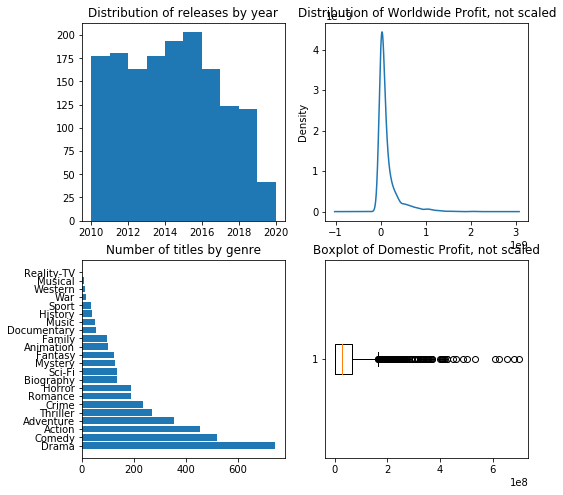

In [18]:
import matplotlib.pyplot as plt

#main_df.year.plot.hist(title='Distribution of Movies by Year');

new_figure = plt.figure(figsize=(8,8))

# Add a subplot to the figure - a new axes
hist_by_year = new_figure.add_subplot(221)

# Add a second subplot to the figure - a new axes
hist_by_profit = new_figure.add_subplot(222)

# Genre value_count bars:
bars_genre = new_figure.add_subplot(223)

# Another dist
fourth_plot = new_figure.add_subplot(224)

# Histogram of release year
hist_by_year.hist(main_df.year)
hist_by_year.set_title('Distribution of releases by year')

# Histogram of profit
main_df.worldwide_profit.plot.density(ax=hist_by_profit)
hist_by_profit.set_title('Distribution of Worldwide Profit, not scaled')

# Bar chart of genre counts:
bars_genre.barh(y = exploded_df.genre_list.value_counts().index, width = exploded_df.genre_list.value_counts())
bars_genre.set_title('Number of titles by genre')

# Boxplot of domestic profit
fourth_plot.boxplot(x = main_df.domestic_profit, vert=False)
fourth_plot.set_title('Boxplot of Domestic Profit, not scaled')

# Show the plot
plt.show()


### What data types do you have?
We have numeric data on budget, runtime, gross, and profit. Year represented as integer, release_date is a datetime, and categorical data about the genres.

## Data Preparation
### Have you looked/dealt with missing values?
Yes, many entries present in the tn movie budgets set are not present in imdb, we used an inner join to drop these entries.  Additionally, we are missing six values for genre, and around 25 for runtime minutes. For now, we have left these in place as we are not yet using runtime minutes, but may impute runtime minutes based on mean/median if we do end up using this, and will likely either leave missing as a category or manually impute genre for the six missing entries. The small number makes this likely to be manageable.
### Have you done any data-type conversion? ex: numerical data incorrectly 'typed' as strings.
Yes, you can find our cleaning work in the document labeled 'Joined_EDA.ipynb' in <a href="https://github.com/jmillerbrooks/mod_1_git_lab">this repo.</a> Our main changes were changing dollar values represented as strings to numeric, creating a profit column from budget and gross, and extracting year from release_date.
### Does your data contain any outliers or non-sensical values?
The set we are working with now does contain some outliers as far as large profits, but does not contain non-sensical values so far as we have found. There are many negative profit values, but this is well within the realm of possibility.

## Modeling/Visualization
### What visualizations have you already made/planning to make?
We have made some boxplots and histograms examining distribution information on release date and profit. We have experimented with some line representations of profit over time by genre. We will likely also make some sort of bubble type plot showing profit over time by genre, with size representing budget/spend for the individual films. We may also take a look at a heatmap or other correlation style visualization to represent studios or individual stakeholders associated with the genre recommendations that we come up with.

### What messages are these visualizations trying to convey?
We would like to show any time patterns/trends in profitability by genre.  We are also interested in conveying the effect of tiered levels of investment (i.e. do you need to spend a certain amount to be profitable within genre categories, should you not spend more than some threshold, or are there in general different patterns of profitability for different levels of investment). With respect to stakeholders and studios, we would like to identify experienced players within the categories developed in the above analysis.
### Are these visualizations effective at communicating the solution to your business question/enhancing your story?
Some are more effective than others, and there appear to be areas where our story is that there is not much correlation in the areas we've identified.